In [1]:
import pandas as pd
file_path = '/kaggle/input/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv'

df = pd.read_csv(file_path)
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2025-04-07,89,False,...,6,-7.727,0,0.0317,0.2890,0.000000,0.126,0.498,157.964,3
1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",2,0,0,NaN,2025-04-07,92,False,...,0,-4.477,0,0.2600,0.0283,0.000000,0.355,0.939,149.027,4
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,3,0,0,NaN,2025-04-07,99,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.117,0.438,104.978,4
3,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,4,0,2,NaN,2025-04-07,81,False,...,2,-6.141,1,0.0600,0.7040,0.000007,0.055,0.391,168.115,3
4,7ne4VBA60CxGM75vw0EYad,That’s So True,Gracie Abrams,5,0,3,NaN,2025-04-07,97,True,...,1,-4.169,1,0.0368,0.2140,0.000000,0.159,0.372,108.548,4


In [2]:
print(df.shape)
print(df.columns)
df.head()

(1905057, 25)
Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2025-04-07,89,False,...,6,-7.727,0,0.0317,0.2890,0.000000,0.126,0.498,157.964,3
1,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",2,0,0,NaN,2025-04-07,92,False,...,0,-4.477,0,0.2600,0.0283,0.000000,0.355,0.939,149.027,4
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,3,0,0,NaN,2025-04-07,99,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.117,0.438,104.978,4
3,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,4,0,2,NaN,2025-04-07,81,False,...,2,-6.141,1,0.0600,0.7040,0.000007,0.055,0.391,168.115,3
4,7ne4VBA60CxGM75vw0EYad,That’s So True,Gracie Abrams,5,0,3,NaN,2025-04-07,97,True,...,1,-4.169,1,0.0368,0.2140,0.000000,0.159,0.372,108.548,4


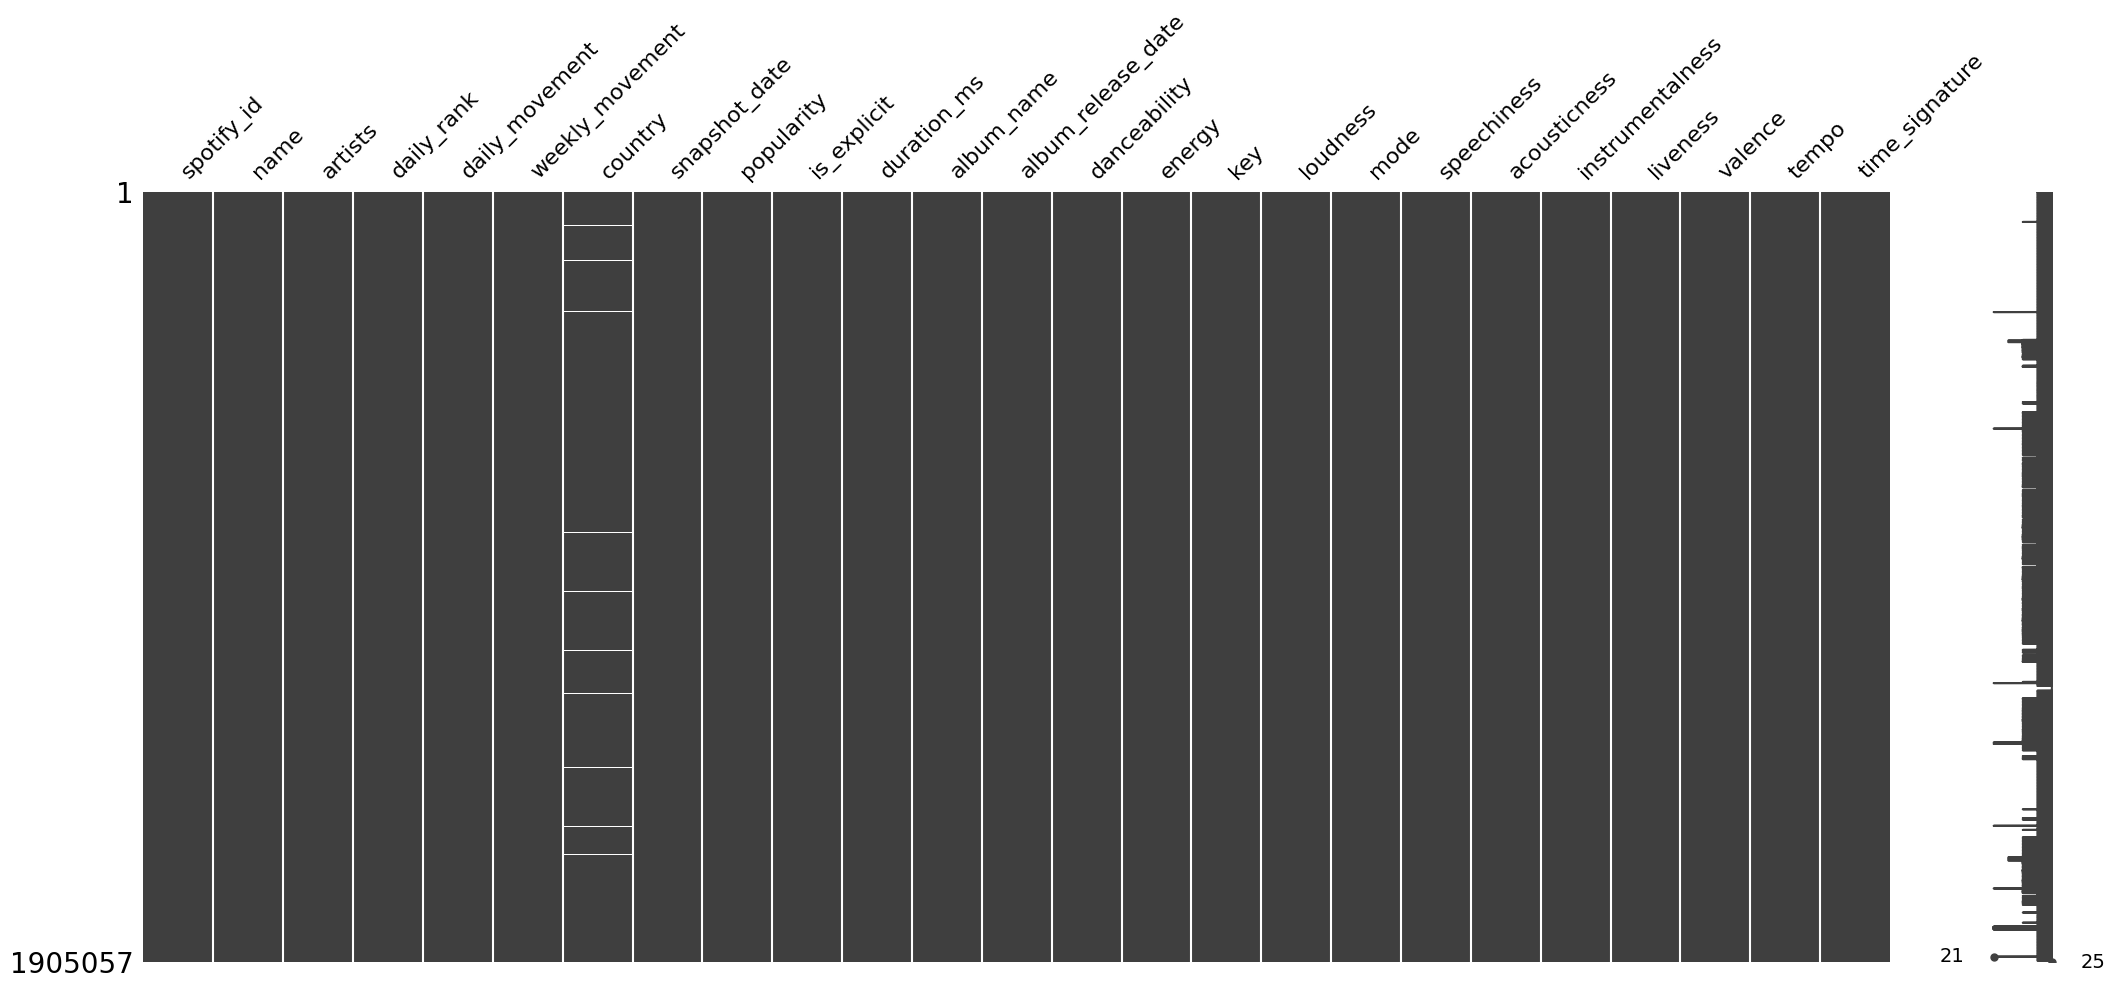

spotify_id            1905057
name                  1905057
artists               1905057
daily_rank            1905057
daily_movement        1905057
weekly_movement       1905057
country               1905057
snapshot_date         1905057
popularity            1905057
is_explicit           1905057
duration_ms           1905057
album_name            1905057
album_release_date    1905057
danceability          1905057
energy                1905057
key                   1905057
loudness              1905057
mode                  1905057
speechiness           1905057
acousticness          1905057
instrumentalness      1905057
liveness              1905057
valence               1905057
tempo                 1905057
time_signature        1905057
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df)
plt.show()
print(df.isna().count())

In [7]:
df.dropna(inplace=True)

<Axes: title={'center': 'Top 10 Songs by Average Daily Rank'}, ylabel='name'>

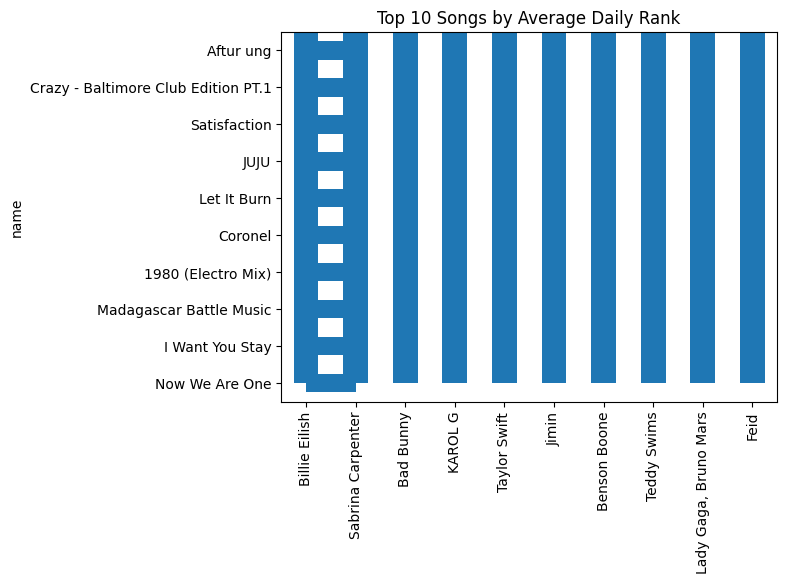

In [8]:
top_artists = df['artists'].value_counts().head(10)
top_artists.plot(kind='bar', title='Top 10 Artists Globally')

popular_songs = df.groupby('name')['daily_rank'].mean().sort_values().head(10)
popular_songs.plot(kind='barh', title='Top 10 Songs by Average Daily Rank')

<ipython-input-28-ec1c008fa42a>:18: UserWarning:

Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.



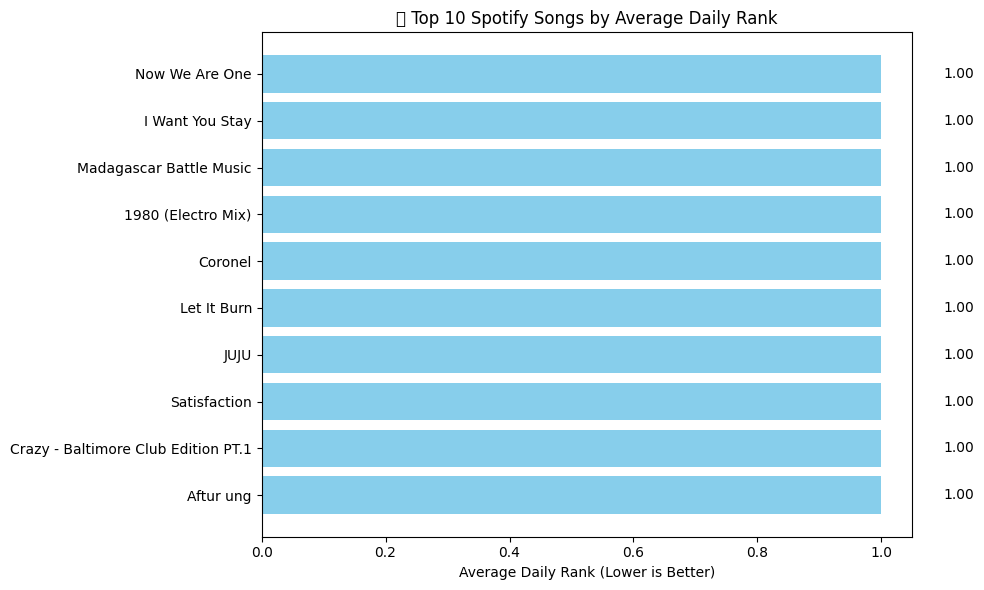

In [28]:
import matplotlib.pyplot as plt

popular_songs = df.groupby('name')['daily_rank'].mean().sort_values().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(popular_songs.index, popular_songs.values, color='skyblue')
plt.xlabel('Average Daily Rank (Lower is Better)')
plt.title('🎶 Top 10 Spotify Songs by Average Daily Rank')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.gca().invert_yaxis()  # So best-ranked song is on top
plt.tight_layout()
plt.show()

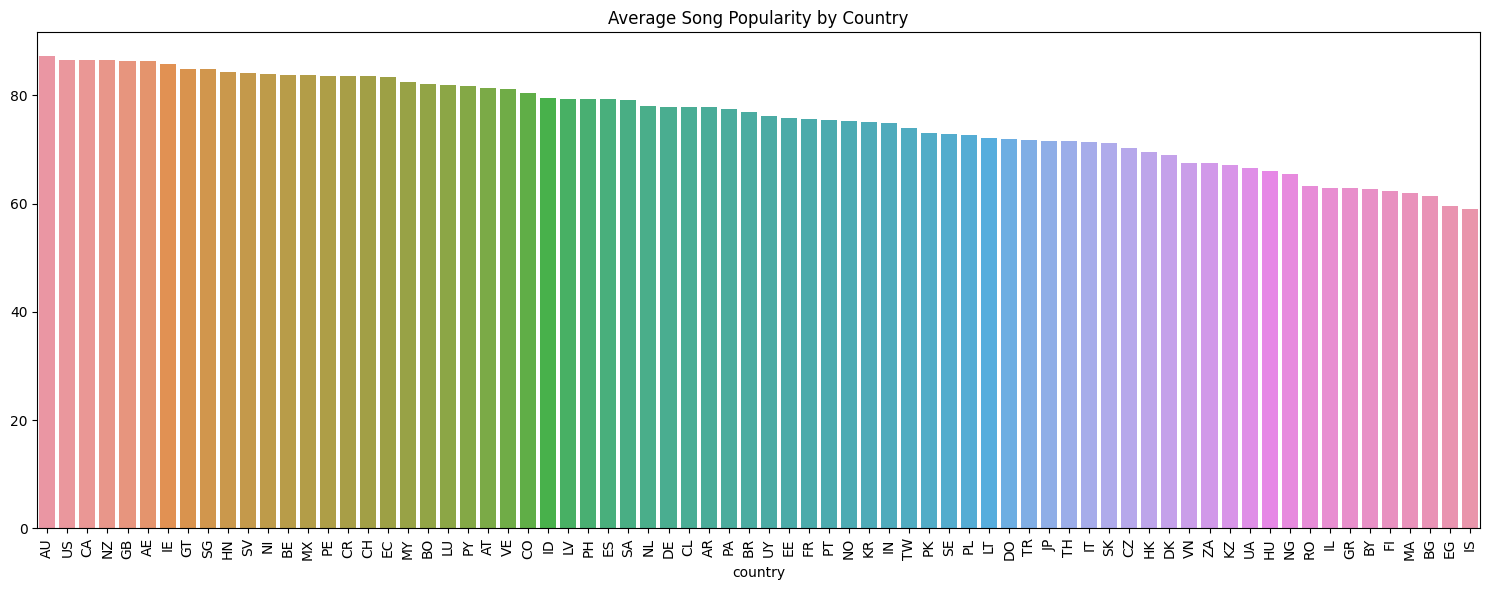

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

country_popularity = df.groupby('country')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=country_popularity.index, y=country_popularity.values)
plt.title("Average Song Popularity by Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

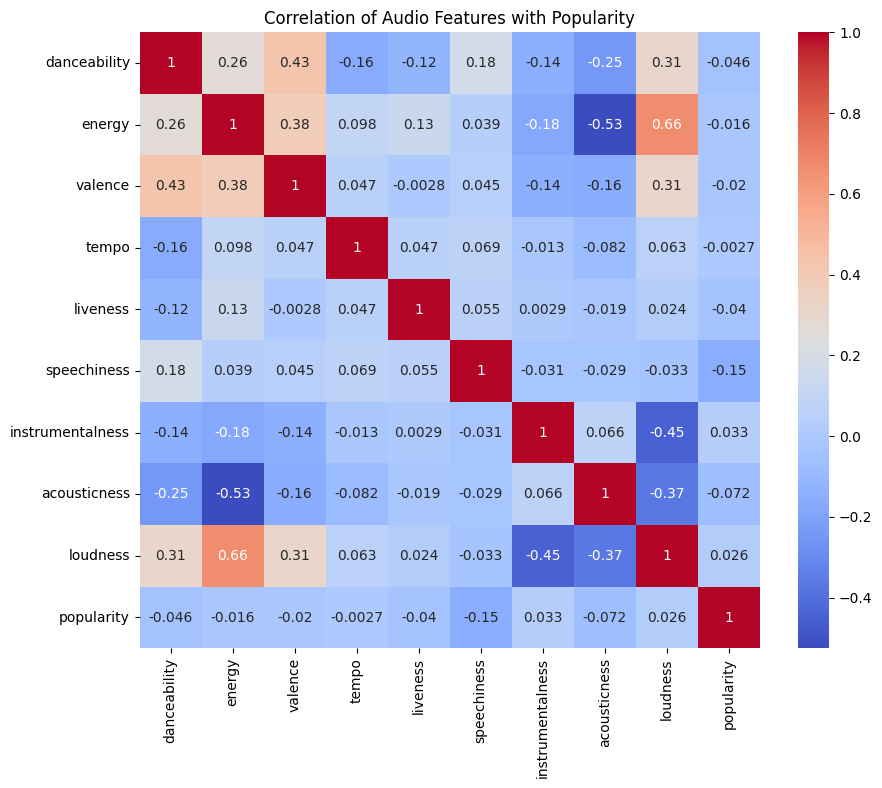

In [10]:
# Select audio features
audio_features = ['danceability', 'energy', 'valence', 'tempo', 'liveness',
                  'speechiness', 'instrumentalness', 'acousticness', 'loudness', 'popularity']
corr = df[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Audio Features with Popularity")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

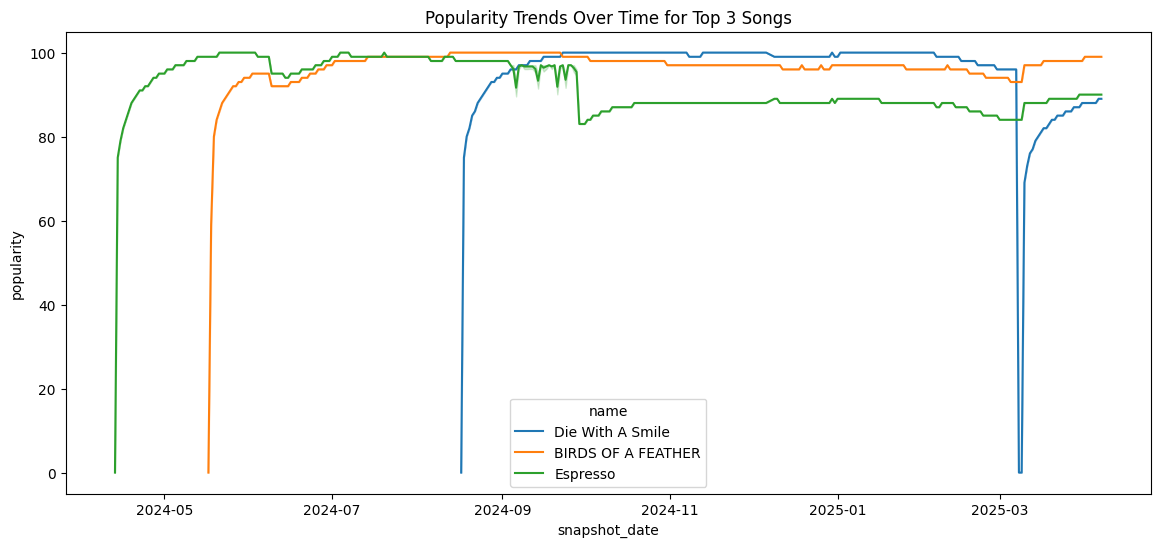

In [11]:
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

# Top 3 songs
top_names = df['name'].value_counts().head(3).index
top_songs = df[df['name'].isin(top_names)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_songs, x='snapshot_date', y='popularity', hue='name')
plt.title("Popularity Trends Over Time for Top 3 Songs")
plt.show()

<Axes: xlabel='is_explicit', ylabel='popularity'>

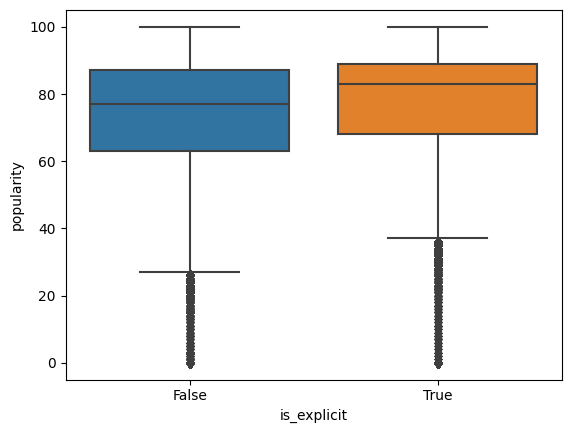

In [16]:
sns.boxplot(x='is_explicit', y='popularity', data=df)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train_scaled, y_train)

y_pred_lr = clf_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64    199240
           1       0.58      0.51      0.55    176397

    accuracy                           0.60    375637
   macro avg       0.60      0.59      0.59    375637
weighted avg       0.60      0.60      0.60    375637



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90    199240
           1       0.91      0.86      0.89    176397

    accuracy                           0.90    375637
   macro avg       0.90      0.89      0.89    375637
weighted avg       0.90      0.90      0.90    375637



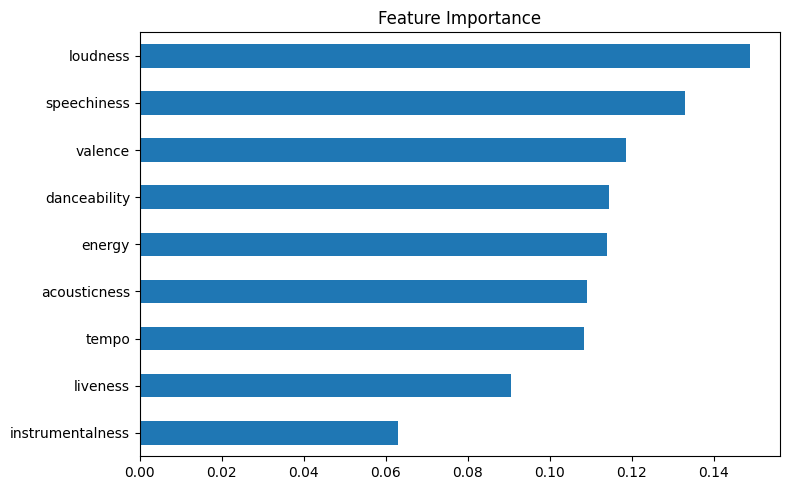

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5), title="Feature Importance")
plt.tight_layout()
plt.show()


In [26]:
def predict_hit(song_features_dict):
    song_df = pd.DataFrame([song_features_dict])
    song_scaled = scaler.transform(song_df)
    pred = rf_clf.predict(song_scaled)
    return "Hit" if pred[0] == 1 else "Not a Hit"

new_song = {
    'danceability': 0.8,
    'energy': 0.85,
    'valence': 0.7,
    'tempo': 120,
    'liveness': 0.1,
    'speechiness': 0.05,
    'instrumentalness': 0.0,
    'acousticness': 0.1,
    'loudness': -5.0
}
print(predict_hit(new_song))

Not a Hit
